# **01.** 사이킷런 소개와 특징

In [ ]:
# 사이킷런 버전 확인

import sklearn

print(sklearn.__version__)

1.0.2


# **02.** 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기



*   분류(Classification) : 대표적인 지도학습(Supervised Learning) 방법의 하나
*   지도학습 : 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식
*   학습 데이터 세트 : 학습을 위해 주어진 데이터 세트
*   테스트 데이터 세트 : 머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트

---

*   sklearn.datasets 모듈 : 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈
*   sklearn.tree 모듈 : 트리 기반 ML 알고리즘을 구현한 클래스의 모임
*   sklearn.model_selection 모듈 : 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임
*   하이퍼 파라미터 : 머신러닝 알고리즘 별로 최적의 학습을 위해 직접 입력하는 파라미터들을 통칭 ⇒ 머신러닝 알고리즘의 성능을 튜닝할 수 있음 !






In [ ]:
from sklearn.datasets import load_iris   # 붓꽃 데이터 세트 생성
from sklearn.tree import DecisionTreeClassifier   # 의사 결정 트리 알고리즘
from sklearn.model_selection import train_test_split   # 데이터 세트를 학습 데이터와 테스트 데이터로 분리

In [ ]:
import pandas as pd

# 붓꽃 데이터 세트 로딩
iris = load_iris()

# iris.data : iris 데이터 세트에서 특성(feature)만으로 된 데이터
iris_data = iris.data

# iris.target : iris 데이터 세트에서 레이블(label)만으로 된 데이터
iris_label = iris.target
print('iris target 값 :', iris_label)
print('iris target 명 :', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target 값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target 명 : ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
# 학습용 데이터와 테스트용 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

### test_size : 전체 데이터 세트 중 테스트 데이터 세트의 비율
### random_state : 호출할 때마다 같은 학습&테스트 용 데이터 세트를 생성하기 위해 주어지는 난수 발생 값

In [ ]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습
dt_clf.fit(X_train, y_train)

# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측
pred = dt_clf.predict(X_test)

# 예측 성능 평가 => 정확도 측정
from sklearn.metrics import accuracy_score
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9333


**데이터 세트로 분류를 예측하는 프로세스**


1.   데이터 세트 분리 : 데이터를 학습 데이터와 테스트 데이터로 분리
2.   모델 학습 : 합습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습
3.   예측 수행 : 학습된 ML 모델을 이용해 테스트 데이터의 분류를 예측
4.   평가 : 이렇게 예측된 결괏값과 테스트 데이터의 실제 결괏값을 비교해 ML 모델 성능을 평가



# **03.** 사이킷런의 기반 프레임워크 익히기

**Estimator 이해 및 fit(), predict() 메서드**

*   사이킷런은 ML 모델 학습을 위해서 fit()을, 학습된 모델의 예측을 위해 predict() 메서드를 제공
*   모든 사이킷런 클래스는 fit()과 predict()만을 이용해 간단하게 학습과 예측 결과를 반환
*   분류 알고리즘을 구현한 클래스(Classifier) + 회귀 알고리즘을 구현한 클래스(Regressor) = Estimator 클래스
*   Estimator : 지도학습의 모든 알고리즘을 구현한 클래스 통칭

**사이킷런의 주요 모듈**
- 예제 데이터
  - sklearn.datasets : 사이킷런에 내장되어 예제로 제공하는 데이터 세트
- 피처 처리
  - sklearn.preprocessing : 데이터 전처리에 필요한 다양한 가공 기능 제공 (문자열을 숫자형 코드 값으로 인코딩, 정규화, 스케일링 등)
  - sklearn.feature_selection : 알고리즘에 큰 영향을 미치는 피처를 우선 순위대로 셀렉션 작업을 수행하는 다양한 기능 제공
  - sklearn.feature_extraction : 텍스트 데이터나 이미지 데이터의 벡터화된 피처를 추출하는데 사용
- 피처 처리 & 차원 축사
  - sklearn.decomposition : 차원 축소와 관련한 알고리즘을 지원하는 모듈
- 데이터 분리, 검증 & 파라미터 튜닝
  - sklearn.model_selection : 교차 검증을 위한 학습용/테스트용 분리, 그리드 서치(Grid Search)로 최적 파라미터 추출 등의 API 제공
- 평가
  - sklearn.metrics : 분류, 회귀, 클러스터링, 페어와이즈에 대한 다양한 성능 측정 방법 제공
- ML 알고리즘
  - sklearn.ensemble : 앙상블 알고리즘 제공 (랜덤 포레스트, 에이다 부스트, 그래디언트 부스팅 등)
  - sklearn.linear_model : 회귀 관련 알고리즘 지원
  - sklearn.naive_bayes : 나이브 베이즈 알고리즘 제공
  - sklearn.neighbors : 최근접 이웃 알고리즘 제공
  - sklearn.svm : 서포트 벡터 머신 알고리즘 제공
  - sklearn.tree : 의사 결정 트리 알고리즘 제공
  - sklearn.cluster : 비지도 클러스터링 알고리즘 제공
- 유틸리티
  - sklearn.pipeline : 피처 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 함께 묶어서 실행할 수 있는 유틸리티 제공

**내장된 예제 데이터 세트**

- 일반적으로 딕셔너리 형태로 돼 있음
- 키는 보통 data, target, target_names, feature_names, DESCR로 구성
  - data : 피처의 데이터 세트
  - target : 분류 시 레이블 값, 회귀일 때는 숫자 결괏값 데이터 세트
  - target_names :개별 레이블의 이름
  - feature_names : 피처의 이름
  - DESCR : 데이터 세트에 대한 설명과 각 피처의 설명

In [ ]:
from sklearn.datasets import load_iris

# 붓꽃 데이터 세트 타입
iris_data = load_iris()
print(type(iris_data))

# 붓꽃 데이터 세트의 키
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들 :', keys)

# feature_names가 가리키는 값
print('\nfeature_names 의 type :', type(iris_data.feature_names))
print('feature_names 의 shape :', len(iris_data.feature_names))
print(iris_data.feature_names)

# target_names가 가리키는 값
print('\ntarget_names 의 type :', type(iris_data.target_names))
print('target_names 의 shape :', len(iris_data.target_names))
print(iris_data.target_names)

# data가 가리키는 값
print('\ndata 의 type :',type(iris_data.data))
print('data 의 shape :',iris_data.data.shape)
print(iris_data['data'])

# target이 가리키는 값
print('\ntarget 의 type :',type(iris_data.target))
print('target 의 shape :',iris_data.target.shape)
print(iris_data.target)

<class 'sklearn.utils.Bunch'>
붓꽃 데이터 세트의 키들 : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

feature_names 의 type : <class 'list'>
feature_names 의 shape : 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

target_names 의 type : <class 'numpy.ndarray'>
target_names 의 shape : 3
['setosa' 'versicolor' 'virginica']

data 의 type : <class 'numpy.ndarray'>
data 의 shape : (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 

※ Bunch 클래스는 파이썬 딕셔너리 자료형과 유사

# **04.** Model Selection 모듈 소개

**학습/테스트 데이터 세트 분리 - train_test_split()**

- 예측을 수행하는 데이터 세트는 학습을 수행한 학습용 데이터 세트가 아닌 전용의 테스트 데이터 세트여야 함
- 사이킷런의 train_test_split() : 원본 데이터 세트에서 학습 및 테스트 데이터 세트를 쉽게 분리

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# ML 알고리즘(의사결정트리), 붓꽃 데이터
dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

# 학습/테스트 데이터 세트 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3, random_state=121)

# 학습 & 예측 정확도 측정
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9556


※ test_size : 전체 데이터에서 테스트 데이서 세트 크기를 얼마로 샘플링할 것인가

※ train_size : 전체 데이터에서 학습용 데이터 세트 크기를 얼마로 샘플링할 것인가

※ shuffle : 데이터를 분리하기 전에 데이터를 미리 섞을지를 결정 ⇒ 데이터를 분산시켜서 좀 더 효율적인 학습 및 테스트 데이터 세트를 만드는 데 사용

※ random_state : 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값



---



**교차 검증**
- 과적합 : 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우에는 예측 성능이 과도하게 떨어지는 것
- 교차 검증 : 데이터 편중을 막기 위해서 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것 ⇒ 각 세트에서 수행한 평가 결과에 따라 하이퍼 파라미터 튜닝 등의 모델 최적화도 가능
- ML에 사용되는 데이터 세트를 세분화해서 학습, 검증, 테스트 데이터 세트로 나눌 수 있음

K 폴드 교차 검증
- K 폴드 교차 검증 : K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법
- 학습 데이터와 검증 데이터 세트를 점진적으로 변경하면서 마지막 K번째까지 학습과 검증을 수행하는 것
- K개의 예측 평가를 구했으면 이를 평균해서 K 폴드 평가 결과로 반영함 !

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print('전체 붓꽃 데이터 세트 크기 :', features.shape[0])

n_iter = 0

# KFold 객체의 split()를 호출하면 폴드별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
  # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1
  # 반복 시마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도 :', np.mean(cv_accuracy))

전체 붓꽃 데이터 세트 크기 : 150

#1 교차 검증 정확도 : 1.0, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#1 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 : 0.9667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#2 검증 세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 : 0.8667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#3 검증 세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 : 0.9333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#4 검증 세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 : 0.7333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#5 검증 세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도 : 0.9


**Stratified K 폴드**

- Stratified K 폴드 : 불균형한(imbalanced) 분포도를 가진 레이블 데이터 집합을 위한 K 폴드 방식
- 불균형한 분포도를 가진 레이블 데이터 집합 = 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것
- K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결해줌 !
- Stratified K 폴드는 원본 데이터의 레이블 분포를 먼저 고려한 뒤 !! 이 분포와 동일하게 학습과 검증 데이터 세트를 분배 !
- 원본 데이터의 레이블 분포도 특성을 반영한 학습 및 검증 데이터 세트를 만들 수 있음 ⇒ 왜곡된 레이블 데이터 세트에서는 반드시 이용 !!
- 일반적으로 분류에서의 교차 검증은 Stratified K 폴드로 분할돼야 함

In [ ]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# 원본 데이터의 레이블 분포 확인
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [ ]:
# 이슈가 발생하는 현상을 도출하기 위해 3개의 폴드 세트를 KFold로 생성하고, 분포도 확인
kfold = KFold(n_splits=3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('\n## 교차 검증 : {0}'.format(n_iter))
  print('학습 레이블 데이터 분포 :\n', label_train.value_counts())
  print('검증 레이블 데이터 분포 :\n', label_test.value_counts())


## 교차 검증 : 1
학습 레이블 데이터 분포 :
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 0    50
Name: label, dtype: int64

## 교차 검증 : 2
학습 레이블 데이터 분포 :
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 1    50
Name: label, dtype: int64

## 교차 검증 : 3
학습 레이블 데이터 분포 :
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 2    50
Name: label, dtype: int64


In [ ]:
# 동일한 데이터 분할을 StratifiedKFold로 수행
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('\n## 교차 검증 : {0}'.format(n_iter))
  print('학습 레이블 데이터 분포 :\n', label_train.value_counts())
  print('검증 레이블 데이터 분포 :\n', label_test.value_counts())


## 교차 검증 : 1
학습 레이블 데이터 분포 :
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 0    17
1    17
2    16
Name: label, dtype: int64

## 교차 검증 : 2
학습 레이블 데이터 분포 :
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 0    17
2    17
1    16
Name: label, dtype: int64

## 교차 검증 : 3
학습 레이블 데이터 분포 :
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 1    17
2    17
0    16
Name: label, dtype: int64


In [ ]:
# 붓꽃 예제 사용해 StratifiedKFold로 데이터 분리
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

# StratifiedKFold의 split() 호출 시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
  # split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)

  # 반복 시마다 정확도 측정
  n_iter += 1
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도 :', np.round(cv_accuracy,4))
print('## 평균 검증 정확도 :', np.round(np.mean(cv_accuracy),4))


#1 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#1 검증 세트 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 : 0.94, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#2 검증 세트 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#3 검증 세트 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도 : [0.98 0.94 0.98]
## 평균 검증 정확도 : 0.9667


교차 검증을 보다 간편하게 - cross_val_score()

- cross_val_score() : cv로 지정된 횟수만큼 scoring 파라미터로 지정된 평가 지표로 평가 결괏값을 배열로 반환 ⟶ 이를 평균해 평가 수치로 사용
- 내부에서 Estimator를 학습(fit), 예측(predict), 평가(evaluation) 시켜주므로 간단하게 교차 검증을 수행
- cross_validate() : 여러 개의 평가 지표 반환, 학습 데이터에 대한 성능 평가 지표와 수행 시간도 같이 제공

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도 :', np.round(scores, 4))
print('평균 검증 정확도 :', np.round(np.mean(scores), 4))

교차 검증별 정확도 : [0.98 0.94 0.98]
평균 검증 정확도 : 0.9667




---

**GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에**

- GridSearchCV : Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공 ⇒ 교차 검증을 기반으로 이 하이퍼 파라미터의 최적 값을 찾게 해줌
- 데이터 세트를 cross-validation을 위한 학습/테스트 세트로 자동 분할  
→ 하이퍼 파라미터 그리드에 기술된 모든 파라미터를 순차적으로 적용  
⇒ 최적의 파라미터 찾기!
- GridSearchCV는 사용자가 튜닝하고자 하는 여러 종류의 하이퍼 파라미터를 다양하게 테스트하면서 최적의 파라미터를 편리하게 찾게 해줌 ⇒ But! 순차적으로 파라미터를 테스트하므로 수행시간이 오래 걸림

GridSearchCV 클래스의 생성자로 들어가는 주요 파라미터
- estimator : classifier, regressor, pipeline
- param_grid : estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값 지정
- scoring : 예측 성능을 측정할 평가 방법 지정
- cv : 교차 검증을 위해 분할되는 학습/테스트 세트의 개수 지정
- refit : 디폴트가 True이 → True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [ ]:
import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


※ params 칼럼 : 적용된 개별 하이퍼 파라미터값  
※ rank_test_score 칼럼 : 하이퍼 파라미터별로 성능이 좋은 score 순위  
※ mean_test_score 칼럼 : CV의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값

In [ ]:
print('GridSearchCV 최적 파라미터 :', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터 : {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.9750


In [ ]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9667


일반적인 머신러닝 모델 적용 방법 :  
> 학습 데이터를 GridSearchCV를 이용해 최적 하이퍼 파라미터 튜닝을 수행  
→ 별도의 테스트 세트에서 이를 평가

# **05.** 데이터 전처리

- ML 알고리즘은 데이터에 기반 ⇒ 어떤 데이터를 입력으로 가지느냐에 따라 결과도 크게 달라질 수 있음
- ML 알고리즘을 적용하기 전에 데이터에 대해 미리 처리해야 할 기본 사항
  > 1. 결손값(NaN, Null) X : Null 값은 고정된 다른 값으로 변환
      - Null 값이 얼마 없을 때 : 특성의 평균값, 최빈값 등으로 대체
      - Null 값이 대부분일 때 : 특성을 아예 제거(drop)
      - Null 값이 일정 수준 이상 될 때 : 중요도가 높은 특성 & Null을 단순히 특성의 평균값으로 대체할 경우 예측 왜곡이 심할 수 있다면 더 정밀한 대체 값 선정하기
  2. 문자열 값 X : 모든 문자열 값은 인코딩돼서 숫자 형으로 변환
      - 카테고리형 특성 : 코드 값으로 표현
      - 텍스트형 특성 : 특성 벡터화(feature vetorization) 등의 기법으로 벡터화하거나 불필요한 특성이라고 판단되면 삭제

**데이터 인코딩**
- 레이블 인코딩(Label encoding) : 카테고리 특성(문자열 값)을 코드형 숫자 값(숫자형 카테고리 값)으로 변환
  - 사이킷런의 LabelEncoder 클래스로 구현
  - 몇몇 ML 알고리즘에는 이를 적용할 경우 예측 성능이 떨어지는 경우가 발생 : 숫자 값의 경우 크고 작음에 대한 특성이 작용 ⇒ 특정 ML 알고리즘에서 가중치가 더 부여되거나 더 중요하게 인식할 가능성이 발생

- 원-핫 인코딩(One-Hot Encoding) : 특성 값의 유형에 따라 새로운 특성을 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고, 나머지 칼럼에는 0을 표시하는 방식
  - 사이킷런의 OneHotEncoder 클래스로 구현
  - 입력값으로 2차원 데이터가 필요
  - 변환한 값이 희소 행렬(Sparse Matrix) 형태 ⇒ toarray() 메서드를 이용해 밀집 행렬(Dense Matrix)로 변환  
  ※ 희소 행렬 ⁉ : 행렬의 원소에 비교적 0이 많은 행렬  
  ※ 밀집 행렬 ⁉ : 희소 행렬과 반대되는 행렬

- 판다스에는 원-핫 인코딩을 더 쉽게 지원하는 API인 get_dummies()가 있음   
: 문자열 카테고리 값을 숫자 형으로 변환할 필요 없이 바로 변환 가능



In [ ]:
### 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

print('인코딩 클래스:',encoder.classes_)

print('디코딩 원본 값:',encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

인코딩 변환값: [0 1 4 5 3 3 2 2]
인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
디코딩 원본 값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


In [ ]:
### 원핫 인코딩
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 2차원 ndarray로 변환합니다.
items = np.array(items).reshape(-1, 1)

# 원-핫 인코딩을 적용합니다.
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환.
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [ ]:
import pandas as pd

df = pd.DataFrame({'item' : ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기','선풍기','믹서','믹서'] })
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


**피처 스케일링과 정규화**

- 피처 스케일링(feature scaling) : 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업 ↪ 표준화(Standardization) & 정규화(Normalization)
- 표준화 : 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환
  > $x_{i} \underline{ }new = \frac{x_i - mean(x)}{stdev(x)}$
- 정규화 : 서로 다른 피처의 크기를 통일하기 위해 크기를 0 ~ 1의 값으로 변환
  > $x_{i} \underline{ }new = \frac{x_i - min(x)}{max(x)-min(x)}$

- 사이킷런의 전처리에서 제공하는 Normalizer 모듈과 일반적인 정규화는 약간의 차이가 있음
  - Normalizer 모듈은 선형대수에서의 정규화 개념이 적용
    > $x_{i} \underline{ }new = \frac{x_i}{\sqrt{x_i^2 + y_i^2 + z_i^2}}$
- 일반적인 의미의 표준화와 정규화를 피처 스케일링으로 통칭 & 선형대수 개념의 정규화를 벡터 정규화로 지칭

**StandardScaler**

- 사이킷런에서 구현한 서포트 벡터 머신, 선형 회귀, 로지스틱 회귀는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현됐기 때문에, 사전에 표준화를 적용해야 함!

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다.
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


**MinMaxScaler**

- MinMaxScaler는 데이터값을 0과 1 사이의 범위 값으로 변환

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


**학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점**

- 데이터의 스케일링 변환 시 fit(), transform(), fit_transform() 메서드를 이용
  - fit() : 데이터 변환을 위ㅏㅎㄴ 기준 정보 설정
  - transform() : 이렇게 설정된 정보를 이용해 데이터를 변환
  - fit_transform() : fit()과 transform()을 한 번에 적용

- 학습 데이터 세트로 fit()과 transform()을 적용하면, 테스트 데이터 세트로는 다시 fit()을 수행하지 않고 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform() 변환을 적용해야 함 !!!

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0 부터 10까지, 테스트 데이터는 0 부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array =  np.arange(0, 6).reshape(-1, 1)

In [ ]:
# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정.
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨.
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [ ]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력.
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


**반드시 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야함 !!!**

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform() 만으로 변환해야 함.
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


**학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점**

1. 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
2. 1이 여의치 않다면 테스트 데이터 변환 시에는 fit()이나 fit_transform()을 적용하지 않고 학습 데이터로 이미 fit()된 Scaler 객체를 이용해 transform()으로 변환

# **06.** 사이킷런으로 수행하는 타이타닉 생존자 예측

타이타닉 탑승자 데이터(https://www.kaggle.com/c/titanic/data)
- Passengerid : 탑승자 데이터 일련번호
- survived : 생존 여부 ( 0 = 사망, 1 = 생존 )
- pclass : 티켓의 선실 등급 ( 1 = 일등석, 2 = 이등석, 3 = 삼등석 )
- sex : 탑승자 성별
- name : 탑승자 이름
- Age : 탑승자 나이
- sibsp : 같이 탑승한 형제자매 또는 배우자 인원수
- parch : 같이 탑승한 부모님 또는 어린이 인원수
- ticket : 티켓 번호
- fare : 요금
- cabin : 선실 번호
- embarked : 중간 정착 항구 ( C = Cherbourg, Q = Queenstown, S = Southampton )

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 구글 코랩 <-> 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')
titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/파이썬 머신러닝 완벽 가이드/titanic_train.csv')
titanic_df.head(3)

Mounted at /content/drive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
# 로딩된 데이터 칼럼 타입 확인
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


사이킷런 머신러닝 알고리즘은 Null 값을 허용하지 않으므로 Null 값을 어떻게 처리할지 결정해야 함 !

- DataFrame의 fillna() 함수를 사용해 간단하게 Null 값을 평균 또는 고정 값으로 변경
- Age의 경우는 평균 나이
- 나머지 칼럼은 'N'값으로 변경

In [ ]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


In [ ]:
# 문자열 특성 Sex, Cabin, Embarked 분류 살펴보기
print('Sex 값 분포 :\n', titanic_df['Sex'].value_counts())
print('\nCabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('\nEmbarked 값 분포 :\n', titanic_df['Embarked'].value_counts())

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [ ]:
# Cabin 속성의 경우 앞 문자만 추출
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64


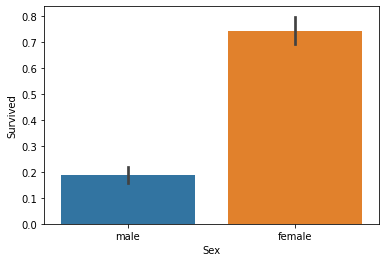

In [ ]:
# 성별에 따른 생존자 수
print(titanic_df.groupby(['Sex', 'Survived'])['Survived'].count())

sns.barplot(x='Sex', y='Survived', data=titanic_df)

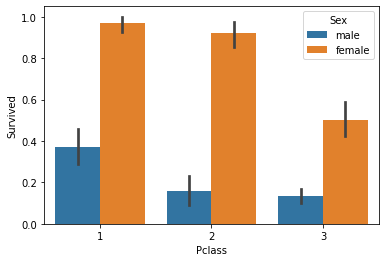

In [ ]:
# 부를 측정할 수 있는 속성(일등실, 이등실, 삼등실)에 따른 생존 확률
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

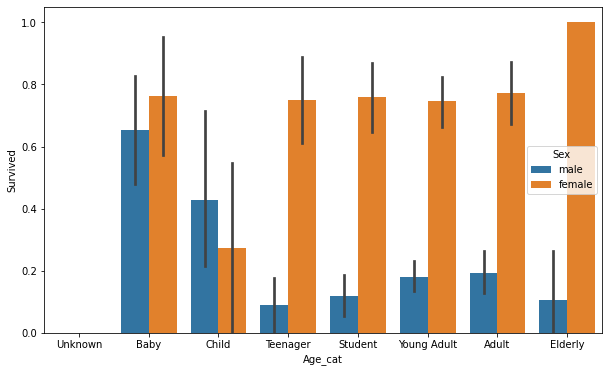

In [ ]:
# Age에 따른 생존 확률 : Baby(0~5세), Child(6~12세), Teenager(13~18세), Student(19~25세), Young Adult(26~35세), Adult(36~60세), Elderly(61세~)

# 입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용.
def get_category(age):
  cat = ''
  if age <= -1 : cat = 'Unknown'
  elif age <= 5 : cat = 'Baby'
  elif age <= 12 : cat = 'Child'
  elif age <= 18 : cat = 'Teenager'
  elif age <= 25 : cat = 'Student'
  elif age <= 35 : cat = 'Young Adult'
  elif age <= 60 : cat = 'Adult'
  else : cat = 'Elderly'

  return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정
# get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

**Sex, Age, Pclass 등이 중요하게 생존을 좌우하는 특성!**

In [ ]:
# 문자열 카테고리 특성을 숫자형 카테고리 특성으로 변환
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


**지금까지의 내용 정리 !**

- Null 처리 함수
- 불필요한 특성 제거
- 레이블 인코딩
- 위의 함수들로 데이터 전처리

In [ ]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [ ]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출.
from google.colab import drive
drive.mount('/content/drive')
titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/파이썬 머신러닝 완벽 가이드/titanic_train.csv')

y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8659


In [ ]:
# KFold 교차 검증으로 결정 트리 모델 좀 더 평가
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []

    # KFold 교차 검증 수행.
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

    # 5개 fold에서의 평균 정확도 계산.
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))
# exec_kfold 호출
exec_kfold(dt_clf , folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [ ]:
# cross_val_score() API 교차 검증
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)

for iter_count, accuracy in enumerate(scores):
  print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))

print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8427
평균 정확도 : 0.7879


In [ ]:
# GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능을 측정
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


※ 일반적으로 하이퍼 파라미터를 튜닝하더라도 이 정도 수준으로 예측 정확도가 증가하기는 매우 어려움 ⇒ 테스트용 데이터 세트가 작기 때문에 수치상으로 예측 성능이 많이 증가한 것처럼 보임 !

# **07.** 정리

- 머신러닝 애플리케이션 :  
  > 데이터의 가공 및 변환 과정의 전처리 작업  
  → 데이터를 학습 데이터와 테스트 데이터로 분리하는 데이터 세트 분리 작업  
  → 학습 데이터를 기반으로 머신러닝 알고리즘을 적용해 모델 학습  
  → 학습된 모델을 기반으로 테스트 데이터에 대한 예측 수행  
  → 예측된 결괏값을 실제 결괏값과 비교해 머신러닝 모델에 대한 평가 수행

- 데이터의 전처리 작업 :  
    - 데이터 클렌징 작업(오류 데이터의 보정, 결손값(Null) 처리 등),  
    - 인코딩 작업(레이블 인코딩, 원-핫 인코딩),  
    - 사전 처리(스케일링, 정규화 작업 등)
- 학습 데이터 세트를 학습 데이터와 검증 데이터로 구성된 여러 개의 폴드 세트로 분리해 교차 검증 수행  
⇒ KFold, StratifiedKFold, cross_val_score() 등



